In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
# Download stop words list and punkt tokenizer (if not previously downloaded)
nltk.download('stopwords')
nltk.download('punkt')
!pip install gensim
!pip install pyLDAvis
!pip install wordcloud matplotlib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.9 MB/s eta 0:00:00


In [ ]:
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv

--2024-11-20 11:54:47--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14174600 (14M) [application/octet-stream]
Saving to: ‘data/full_dataset/goemotions_1.csv’

goemotions_1.csv    100%[===================>]  13.52M  79.7MB/s    in 0.2s    

2024-11-20 11:54:48 (79.7 MB/s) - ‘data/full_dataset/goemotions_1.csv’ saved [14174600/14174600]

--2024-11-20 11:54:48--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting respo

In [ ]:
goemotions_1 = pd.read_csv('data/full_dataset/goemotions_1.csv')
goemotions_2 = pd.read_csv('data/full_dataset/goemotions_2.csv')
goemotions_3 = pd.read_csv('data/full_dataset/goemotions_3.csv')

combined_df = pd.concat([goemotions_1, goemotions_2, goemotions_3], ignore_index=True)
emotion_columns = combined_df.columns[9:]
user_emotions = combined_df.groupby('author', as_index=False)[emotion_columns].sum()
overall_emotions_avg = combined_df[emotion_columns].mean()
combined_df['created_utc'] = pd.to_datetime(combined_df['created_utc'], unit='s', errors='coerce')
combined_df['date'] = combined_df['created_utc'].dt.date
combined_df.to_csv('data/full_dataset/goemotions_combined.csv', index=False)

In [ ]:
combined_df

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,date
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,2019-01-25 01:50:39,1,False,0,...,0,0,0,0,0,0,1,0,0,2019-01-25
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,2019-01-21 15:22:49,37,True,0,...,0,0,0,0,0,0,0,0,0,2019-01-21
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,2019-01-02 11:15:44,37,False,0,...,0,0,0,0,0,0,0,0,1,2019-01-02
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,2019-01-20 06:17:34,18,False,0,...,0,0,0,0,0,0,0,0,0,2019-01-20
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,2019-01-05 06:10:01,2,False,0,...,0,0,0,0,0,0,0,0,1,2019-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211220,Everyone likes [NAME].,ee6pagw,Senshado,heroesofthestorm,t3_agjf24,t3_agjf24,2019-01-16 10:25:22,16,False,0,...,0,0,0,0,0,0,0,0,0,2019-01-16
211221,Well when you’ve imported about a gazillion of...,ef28nod,5inchloser,nottheonion,t3_ak26t3,t3_ak26t3,2019-01-27 01:39:42,15,False,0,...,0,0,0,0,0,0,0,0,0,2019-01-27
211222,That looks amazing,ee8hse1,springt1me,shittyfoodporn,t3_agrnqb,t3_agrnqb,2019-01-17 00:08:54,70,False,1,...,0,0,0,0,0,0,0,0,0,2019-01-17
211223,The FDA has plenty to criticize. But like here...,edrhoxh,enamedata,medicine,t3_aejqzd,t1_edrgdtx,2019-01-11 01:07:12,4,False,0,...,0,0,0,0,0,0,0,0,0,2019-01-11


In [ ]:
author_counts = combined_df['author'].value_counts()
print("Author counts:\n", author_counts)

Author counts:
 author
[deleted]          3882
CakeDay--Bot         96
devildriver77        74
Ahren_with_an_h      57
saturdeity           57
                   ... 
MooksDMD              1
nivekious             1
Diarrhea_Dragon       1
plantstand            1
BBuobigos             1
Name: count, Length: 49178, dtype: int64


# The function get_user_emotions is designed to analyze a specific user's emotion profile from a dataset.

## What the function does:
1. Checks if the user exists: Verifies if the user is present in the dataset index (user_emotions).
2.General statistics:
 * Calculates the total number of emotions associated with the user.
 * Determines how many times the user appears in the dataset.
 * Identifies the number of emotions exceeding the overall average   (overall_emotions_avg).
3. User's contribution to total emotions: Computes the percentage of total emotions in the dataset contributed by the user.
4. Top emotions: Displays the user's most significant emotions, sorted in descending order.
5. Bar chart visualization: Creates a bar chart showing the user's emotion distribution.
6. Radar chart visualization: Generates a radar chart to visualize the user's emotion profile.
7.Returns results: Returns a sorted series of the user's emotions.

If the user is not found in the dataset, the function returns an appropriate message.

## Main use cases:
* Analyzing user behavior based on their emotional patterns.
* Identifying unique emotional traits of a specific user.
* Providing informative visualizations of a user's emotional profile.







Total emotions for user 'CakeDay--Bot': 114
User 'CakeDay--Bot' appears 28 times in the dataset.
Number of emotions exceeding the overall average: 13

Emotions exceeding the overall average:
  amusement: 2
  annoyance: 1
  approval: 3
  caring: 4
  disapproval: 1
  excitement: 23
  gratitude: 2
  joy: 25
  love: 10
  optimism: 1
  realization: 17
  surprise: 5
  neutral: 20

User 'CakeDay--Bot' contributes 0.05% to the total emotions in the dataset.

Top emotions for the user:
joy            25
excitement     23
neutral        20
realization    17
love           10
Name: CakeDay--Bot, dtype: int64


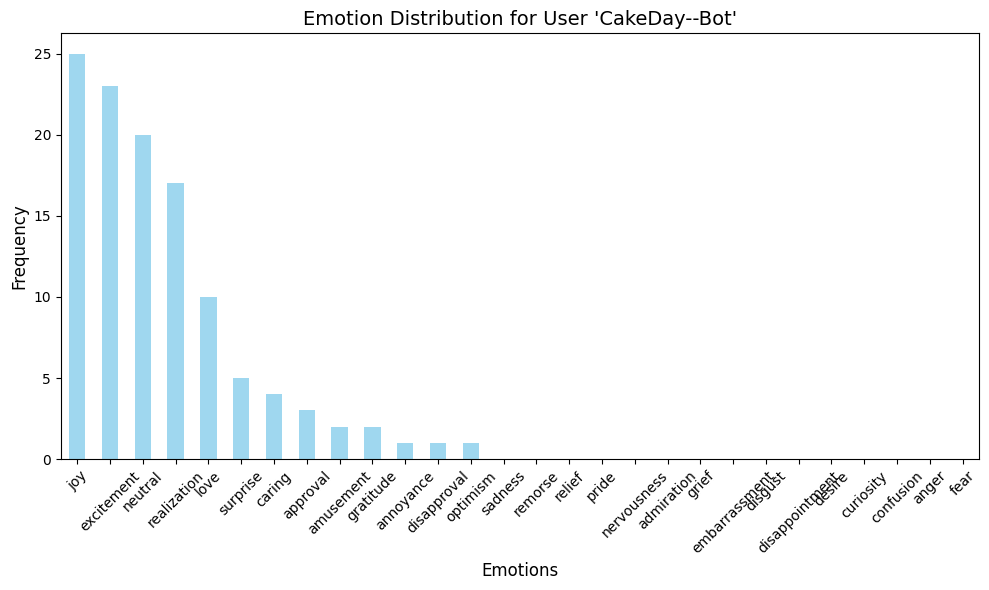

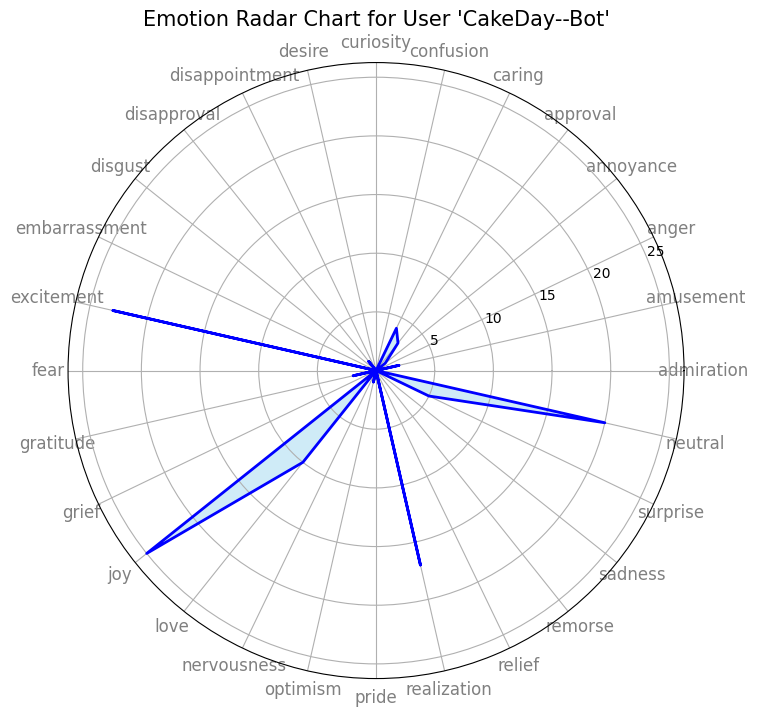

joy               25
excitement        23
neutral           20
realization       17
love              10
surprise           5
caring             4
approval           3
amusement          2
gratitude          2
annoyance          1
disapproval        1
optimism           1
sadness            0
remorse            0
relief             0
pride              0
nervousness        0
admiration         0
grief              0
embarrassment      0
disgust            0
disappointment     0
desire             0
curiosity          0
confusion          0
anger              0
fear               0
Name: CakeDay--Bot, dtype: int64


In [ ]:


import matplotlib.pyplot as plt
import numpy as np
from math import pi
import matplotlib.pyplot as plt

def get_user_emotions(user):
    if user in user_emotions.index:
        user_1 = user_emotions.loc[user]
        exceeding_emotions = user_1[user_1 > overall_emotions_avg]

        # Total emotions and appearances
        total_emotions = user_1.sum()
        user_appearance_count = user_emotions.loc[user].count()

        print(f"Total emotions for user '{user}': {total_emotions}")
        print(f"User '{user}' appears {user_appearance_count} times in the dataset.")
        print(f"Number of emotions exceeding the overall average: {len(exceeding_emotions)}")

        # Detailed emotions exceeding the average
        if not exceeding_emotions.empty:
            print("\nEmotions exceeding the overall average:")
            for emotion, value in exceeding_emotions.items():
                print(f"  {emotion}: {value}")
        else:
            print("\nNo emotions exceed the overall average.")

        # Calculate percentage contribution to overall emotions
        user_percentage = (total_emotions / user_emotions.sum().sum()) * 100
        print(f"\nUser '{user}' contributes {user_percentage:.2f}% to the total emotions in the dataset.")

        # Sort emotions in descending order
        sorted_emotions = user_1.sort_values(ascending=False)
        print("\nTop emotions for the user:")
        print(sorted_emotions.head())

        # Plot distribution of user's emotions
        plt.figure(figsize=(10, 6))
        sorted_emotions.plot(kind='bar', color='skyblue', alpha=0.8)
        plt.title(f"Emotion Distribution for User '{user}'", fontsize=14)
        plt.xlabel("Emotions", fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Radar chart for emotion distribution
        categories = user_1.index
        values = user_1.values
        N = len(categories)

        angles = [n / float(N) * 2 * pi for n in range(N)]
        values = np.append(values, values[0])
        angles += angles[:1]

        plt.figure(figsize=(8, 8))
        ax = plt.subplot(111, polar=True)
        plt.xticks(angles[:-1], categories, color='grey', size=12)
        ax.plot(angles, values, linewidth=2, linestyle='solid', color='blue')
        ax.fill(angles, values, color='skyblue', alpha=0.4)
        plt.title(f"Emotion Radar Chart for User '{user}'", size=15)
        plt.show()

        return sorted_emotions
    else:
        return f"User '{user}' not found in the data."



# Calling the function for the user '[deleted]'
print(get_user_emotions('CakeDay--Bot'))

The analyze_user_emotions function is designed to provide a comprehensive analysis of a specific user's emotional patterns over time and in comparison to overall trends in the dataset.

###Key Features:
1. Trend Analysis: Aggregates and visualizes the user's emotional trends over time using line plots.
2. Comparison to Overall Data: Compares the user's average emotional intensities with the overall dataset averages via bar charts.
3. Emotion Intensity Metric: Calculates the average emotion intensity per interaction for the user.
4. Correlation Analysis: Computes and visualizes correlations between the user's emotions using a heatmap.
5. Emotion Distribution: Displays a radar chart of the user's average emotional profile.

###Output:
The function returns a dictionary containing:
* Emotion trends over time.
* A comparison of the user's average emotions versus the overall dataset.
The emotion intensity metric.
* A correlation matrix for the user's emotions.
* The user's average emotional intensities.
This function is ideal for dynamic, time-sensitive, and comparative analyses of user emotions.

In [ ]:
user_emotions[emotions]

NameError: name 'emotions' is not defined

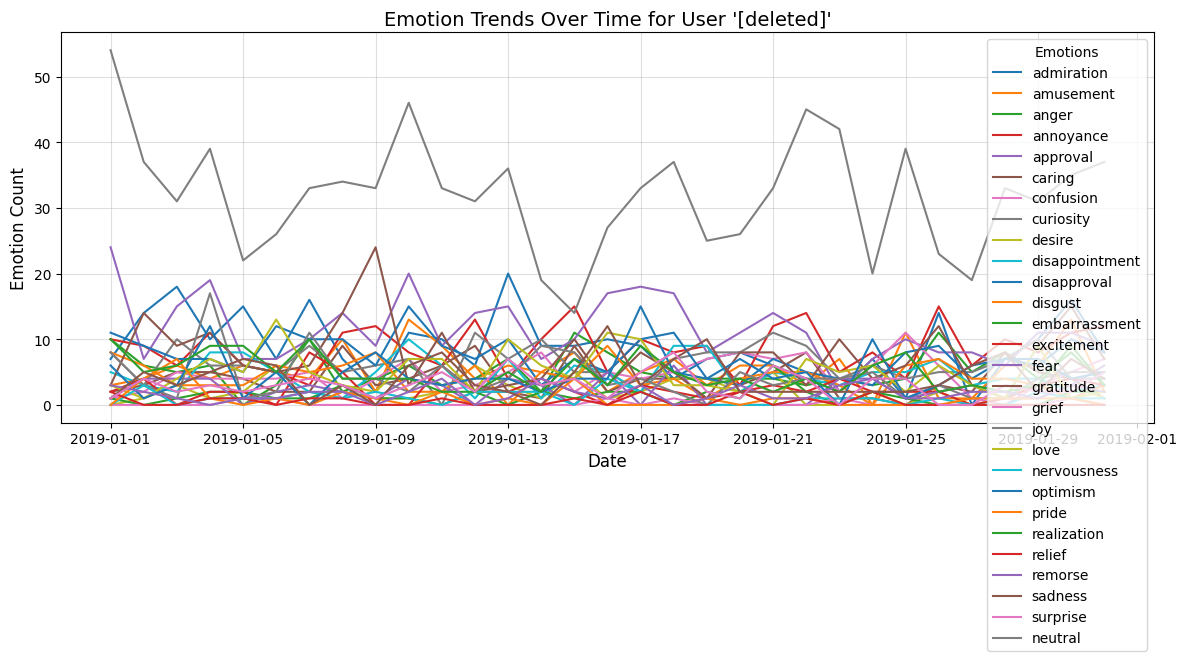

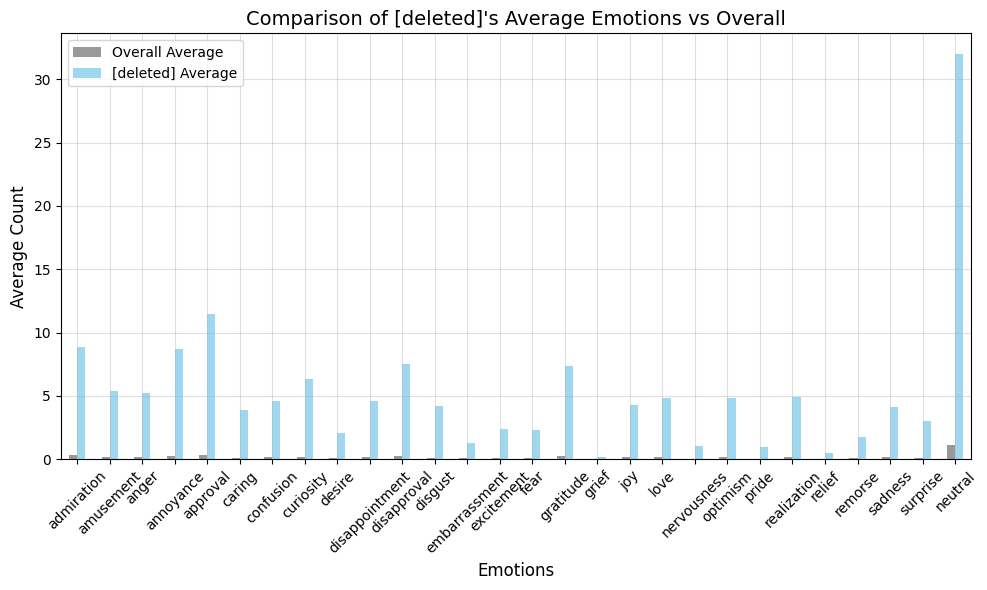

Emotion Intensity Metric for [deleted]: 148.42


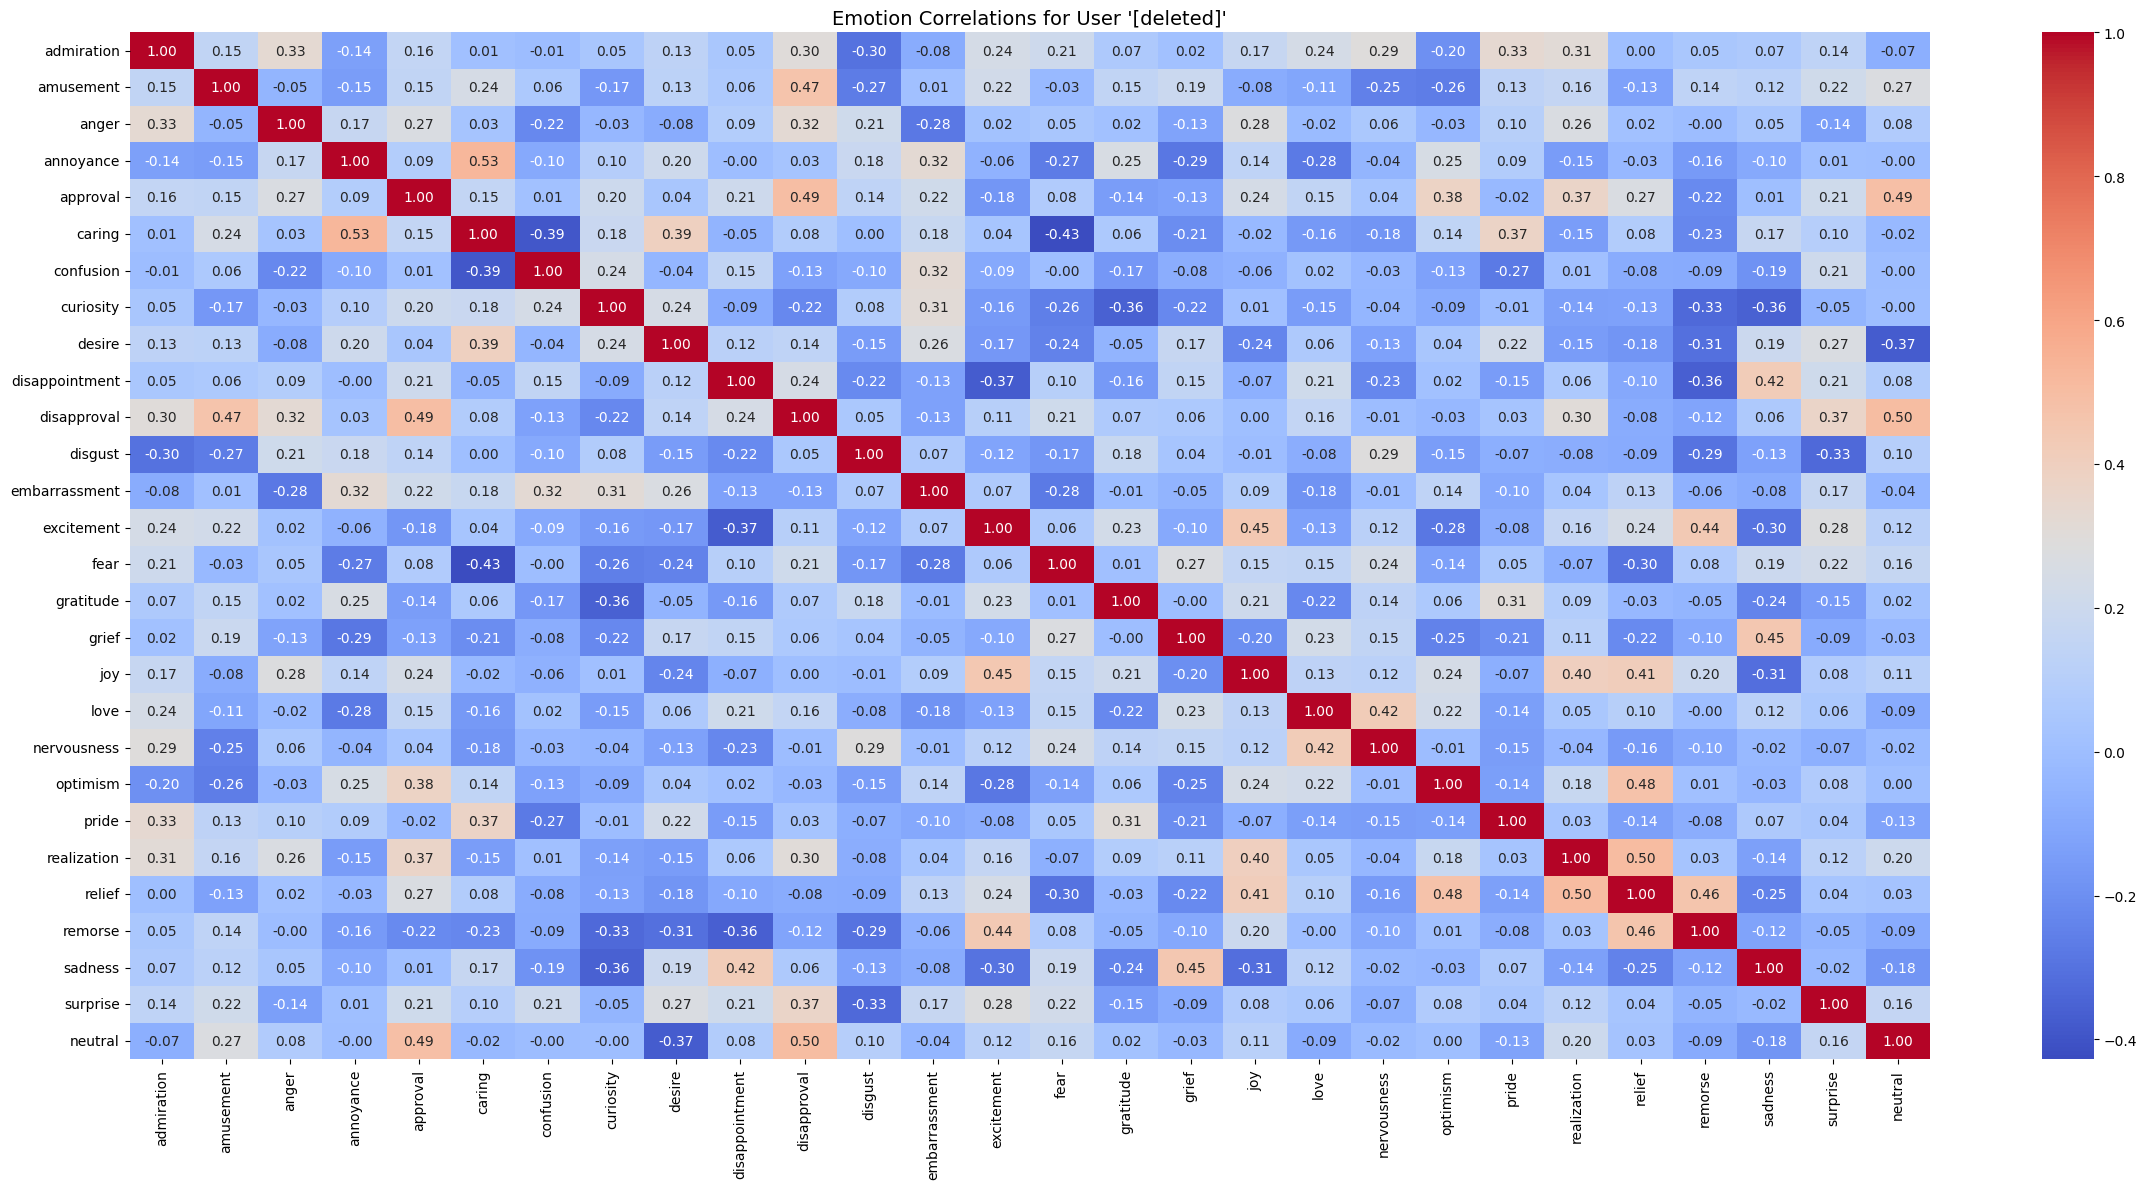

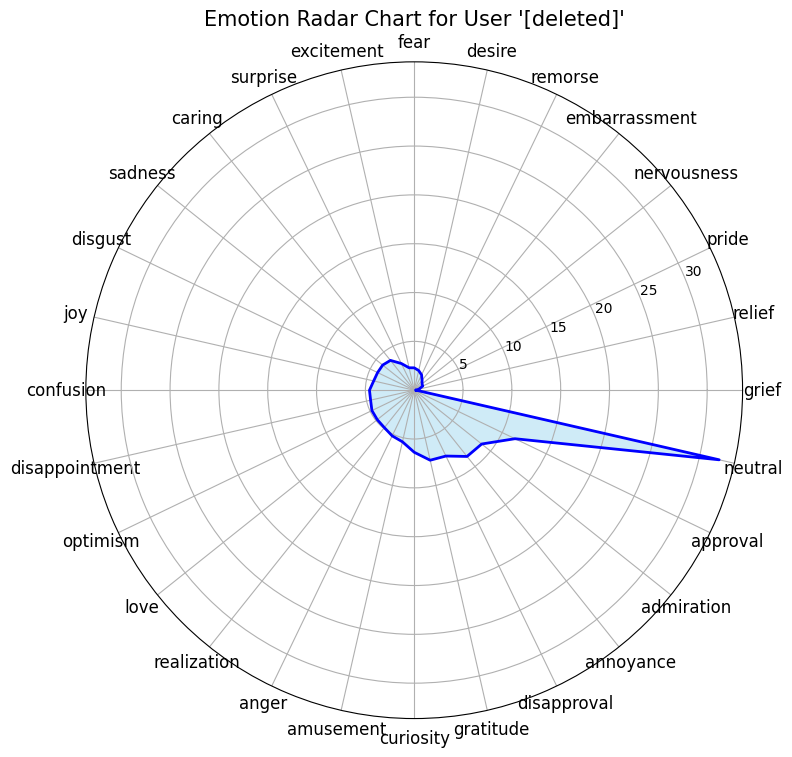

Emotion Trends:
            admiration  amusement  anger  annoyance  approval  caring  \
date                                                                    
2019-01-01           7          3     10         10        24       2   
2019-01-02          14          4      6          9         7       3   
2019-01-03          18          6      5          6        15       5   
2019-01-04          10          4      6         11        19       5   
2019-01-05          15          6      0          6         7       4   
2019-01-06           7          5      3          5         7       2   
2019-01-07          16          4     10          3        10       2   
2019-01-08           7         10      2         11        14       9   
2019-01-09           2          2      4         12         9       3   
2019-01-10          11         13      6          8        20       4   
2019-01-11          10          9      3          6         9       6   
2019-01-12           6          4  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

def analyze_user_emotions(user_emotions, target_user):
    combined_df['date'] = combined_df['created_utc'].dt.date
    user_emotions1 = combined_df.groupby(['author', 'date'])[emotion_columns].sum()
    # Aggregating emotions by date for trend analysis
    user_data = user_emotions1.loc[target_user]
    user_data_by_date = user_data.groupby('date')[emotion_columns].sum()

    # 1. Plotting emotion trends over time
    plt.figure(figsize=(12, 6))
    for emotion in emotion_columns:
        plt.plot(user_data_by_date.index, user_data_by_date[emotion], label=emotion)

    plt.title(f"Emotion Trends Over Time for User '{target_user}'", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Emotion Count", fontsize=12)
    plt.legend(title="Emotions", fontsize=10)
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.show()

    # 2. Comparing the user's emotions to other users
    overall_avg = user_emotions[emotion_columns].mean()
    user_avg = user_data[emotion_columns].mean()
    comparison = pd.DataFrame({'Overall Average': overall_avg, f"{target_user} Average": user_avg})

    # Bar chart for comparison
    comparison.plot(kind='bar', figsize=(10, 6), color=['gray', 'skyblue'], alpha=0.8)
    plt.title(f"Comparison of {target_user}'s Average Emotions vs Overall", fontsize=14)
    plt.xlabel("Emotions", fontsize=12)
    plt.ylabel("Average Count", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.show()

    # 3. Emotion intensity metric (average per interaction)
    user_interactions = len(user_data)
    intensity_metric = user_data[emotion_columns].sum().sum() / user_interactions
    print(f"Emotion Intensity Metric for {target_user}: {intensity_metric:.2f}")

    # 4. Correlation between emotions for the user
    correlation_matrix = user_data[emotion_columns].corr()

    # Heatmap for correlations
    plt.figure(figsize=(24, 12))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
    plt.title(f"Emotion Correlations for User '{target_user}'", fontsize=14)
    plt.tight_layout()
    plt.show()

    # 5. Radar chart for user emotion distribution
    user_avg_sorted = user_avg.sort_values()
    categories = user_avg_sorted.index.tolist()
    values = user_avg_sorted.values.tolist()
    values += values[:1]
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories, color='black', fontsize=12)
    ax.plot(angles, values, linewidth=2, linestyle='solid', color='blue')
    ax.fill(angles, values, color='skyblue', alpha=0.4)
    plt.title(f"Emotion Radar Chart for User '{target_user}'", size=15)
    plt.tight_layout()
    plt.show()

    return {
        'emotion_trends': user_data_by_date,
        'comparison': comparison,
        'intensity_metric': intensity_metric,
        'correlation_matrix': correlation_matrix,
        'user_avg': user_avg
    }
target_user = '[deleted]'

analysis_results = analyze_user_emotions(user_emotions, target_user)

print("Emotion Trends:")
print(analysis_results['emotion_trends'])

print("\nComparison of User's Average Emotions vs Overall:")
print(analysis_results['comparison'])

print(f"\nEmotion Intensity Metric for {target_user}: {analysis_results['intensity_metric']:.2f}")

print("\nCorrelation Matrix:")
print(analysis_results['correlation_matrix'])

print("\nUser's Average Emotions:")
print(analysis_results['user_avg'])



In [ ]:
def count_raters_above_emotion_threshold(emotion, percent):
    if emotion not in user_emotions.columns:
        return f"Emotion '{emotion}' not found in the data."

    total_tags_per_rater = user_emotions.sum(axis=1)

    emotion_percent_per_rater = (user_emotions[emotion] / total_tags_per_rater) * 100

    raters_above_threshold = emotion_percent_per_rater[emotion_percent_per_rater >= percent]

    return list(raters_above_threshold.index)
emotion = 'anger'
percent = 100
print(f"Number of raters tagging '{emotion}' above {percent}%: {len(count_raters_above_emotion_threshold(emotion, percent))} {count_raters_above_emotion_threshold(emotion, percent)}  ")

Number of raters tagging 'anger' above 100%: 108 ['0lightheavyweight0', '1GREG7_YT', '4inchsurprise', 'BRADSOMMERS', 'Boomer8450', 'Chris-P', 'CleanestBirb', 'ColHaberdasher', 'DeathByUnicornn', 'DeliciousTidePod', 'Ebenezer-Grim', 'Eliju', 'FOX_SMOLDER', 'FYourTeam', 'FjolnirFimbulvetr', 'Ganjidog', 'GoodMoleman2You', 'HelloMyNameIsRuben', 'Hugh_Gekok', 'Hungry_Coyotes', 'IDoNotAgreeWithYou', 'JACK9310', 'JamesTheKid', 'JohnRyanMurphyIsGOD', 'KapiTod', 'LackingBrainForName', 'M2Dazas', 'Machineplanett', 'MaidenMB', 'Mead76', 'MimicTMI', 'PM_ME_UR_BOOOOTY', 'Popeworm', 'PrecisionChemist', 'Rabbit-Punch', 'ReeeeeBB', 'RockyB95', 'Sataris', 'Schmoopyeh', 'Shtruntz', 'Skore_Smogon', 'Slime_Hina', 'SomeRandomDude821', 'StranzVanWaldenberg', 'Supreme0Ruler', 'TehEpikNuwbie', 'Thatniqqarylan', 'TheLoathesomeRich', 'Tkldsphincter', 'Tofo_nofo', 'Willie_is_King', 'WumpaGames', 'YoshiHD', 'YouEvenCarve', 'Z0idberg_MD', '_pixelheart', 'airoderinde', 'apakras1', 'babycatcherlady', 'beat_tapes', '

The function count_raters_above_emotion_threshold calculates the number of raters who exceed a specified percentage threshold for a given emotion.

### Parameters:
* emotion (optional): The specific emotion to check (e.g., "joy", "anger"). If provided, the function will return the raters who have a percentage of this emotion above the specified threshold.
* percent: The percentage threshold to filter raters. Only raters with an emotion percentage greater than or equal to this value will be counted.
### Function Logic:
1. If an emotion is specified:
 * The function calculates the percentage of that emotion for each rater.
 * It filters and returns the raters who exceed the specified threshold along
  with the count of these raters.
2. If no emotion is specified:
* The function calculates the emotion percentage for all emotions and returns
  the count of raters who exceed the threshold for each emotion.
### Return:
A dictionary containing either the results for a specific emotion or a dictionary of all emotions with their respective raters and counts.

In [ ]:
def count_raters_above_emotion_threshold(emotion=None, percent=None):
    if emotion and emotion not in user_emotions.columns:
        return f"Emotion '{emotion}' not found in the data."

    total_tags_per_rater = user_emotions.sum(axis=1)

    if emotion:
        emotion_percent_per_rater = (user_emotions[emotion] / total_tags_per_rater) * 100
        raters_above_threshold = emotion_percent_per_rater[emotion_percent_per_rater >= percent]
        return {
            "emotion": emotion,
            "raters_above_threshold": list(raters_above_threshold.index),
            "count": len(raters_above_threshold)
        }

    emotions_above_threshold = {}
    for emotion in user_emotions.columns:
        emotion_percent_per_rater = (user_emotions[emotion] / total_tags_per_rater) * 100
        raters_above_threshold = emotion_percent_per_rater[emotion_percent_per_rater >= percent]
        emotions_above_threshold[emotion] = {
            "raters_above_threshold": list(raters_above_threshold.index),
            "count": len(raters_above_threshold)
        }

    return emotions_above_threshold


emotion = 'anger'
percent = 100
result = count_raters_above_emotion_threshold(emotion=emotion, percent=percent)

if isinstance(result, dict):
    print(f"Number of raters tagging '{emotion}' above {percent}%: {result['count']}")
    print(f"Users: {result['raters_above_threshold']}")
else:
    print(result)

print("\nAnalysis for all emotions:")
all_emotions_result = count_raters_above_emotion_threshold(percent=percent)
for emotion, data in all_emotions_result.items():
    print(f"Emotion '{emotion}': {data['count']} raters above {percent}%")
    print(f"Users: {data['raters_above_threshold']}\n")


Number of raters tagging 'anger' above 100%: 108
Users: ['0lightheavyweight0', '1GREG7_YT', '4inchsurprise', 'BRADSOMMERS', 'Boomer8450', 'Chris-P', 'CleanestBirb', 'ColHaberdasher', 'DeathByUnicornn', 'DeliciousTidePod', 'Ebenezer-Grim', 'Eliju', 'FOX_SMOLDER', 'FYourTeam', 'FjolnirFimbulvetr', 'Ganjidog', 'GoodMoleman2You', 'HelloMyNameIsRuben', 'Hugh_Gekok', 'Hungry_Coyotes', 'IDoNotAgreeWithYou', 'JACK9310', 'JamesTheKid', 'JohnRyanMurphyIsGOD', 'KapiTod', 'LackingBrainForName', 'M2Dazas', 'Machineplanett', 'MaidenMB', 'Mead76', 'MimicTMI', 'PM_ME_UR_BOOOOTY', 'Popeworm', 'PrecisionChemist', 'Rabbit-Punch', 'ReeeeeBB', 'RockyB95', 'Sataris', 'Schmoopyeh', 'Shtruntz', 'Skore_Smogon', 'Slime_Hina', 'SomeRandomDude821', 'StranzVanWaldenberg', 'Supreme0Ruler', 'TehEpikNuwbie', 'Thatniqqarylan', 'TheLoathesomeRich', 'Tkldsphincter', 'Tofo_nofo', 'Willie_is_King', 'WumpaGames', 'YoshiHD', 'YouEvenCarve', 'Z0idberg_MD', '_pixelheart', 'airoderinde', 'apakras1', 'babycatcherlady', 'beat_ta

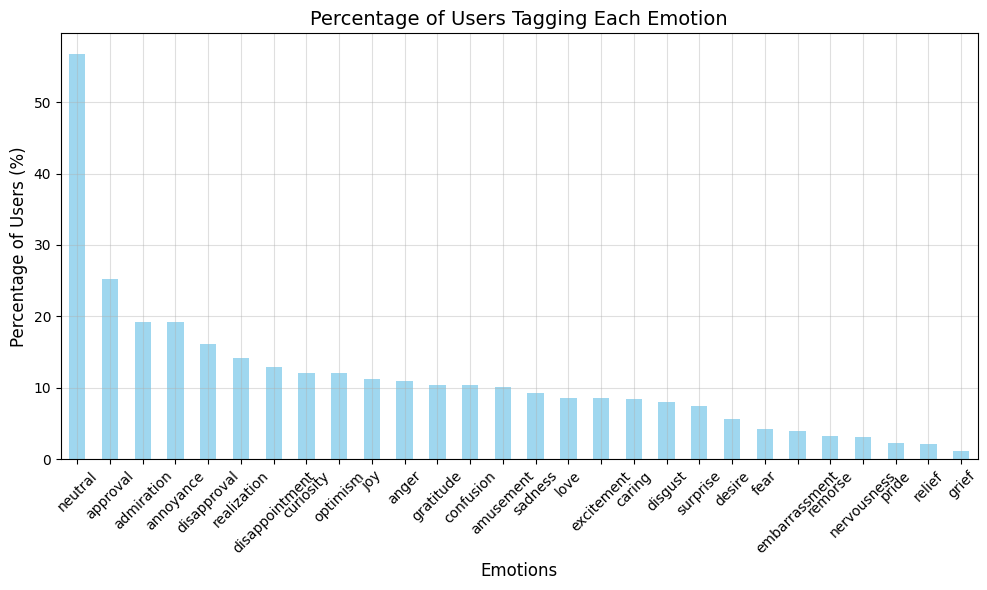

In [ ]:
def plot_emotion_percentages():
    # Calculate the percentage of users who have tagged each emotion
    total_users = len(user_emotions)
    emotion_percentages = (user_emotions.astype(bool).sum(axis=0) / total_users) * 100

    # Sort emotions by percentage in descending order
    sorted_emotions = emotion_percentages.sort_values(ascending=False)

    # Create a bar plot for emotion percentages
    plt.figure(figsize=(10, 6))
    sorted_emotions.plot(kind='bar', color='skyblue', alpha=0.8)
    plt.title("Percentage of Users Tagging Each Emotion", fontsize=14)
    plt.xlabel("Emotions", fontsize=12)
    plt.ylabel("Percentage of Users (%)", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_emotion_percentages()

The function plot_emotions_by_thresholds visualizes and returns the number of raters exceeding various emotion thresholds for a set of emotions.

### Parameters:
 * user_emotions: The dataset containing emotion data for different raters.
 * thresholds: A list of percentage thresholds to check for each emotion (default is [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]).
 * emotions: A list of emotions to analyze (default is None, meaning all emotions will be analyzed).
### Function Logic:
1. For each emotion, the function counts the number of raters exceeding each threshold.
2. It creates a bar chart for each emotion, showing the number of raters who exceed each threshold.
3. The function compiles the data into a matrix (emotion_threshold_matrix), which contains the counts of raters for each threshold and emotion.

### Return:
A DataFrame (emotion_threshold_matrix) with the number of raters above each threshold for each emotio

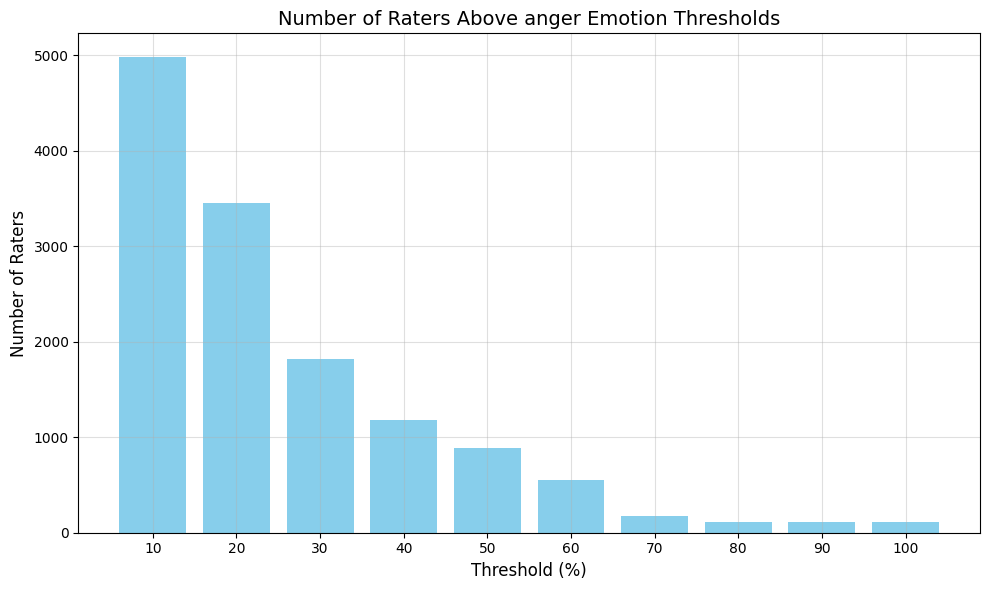

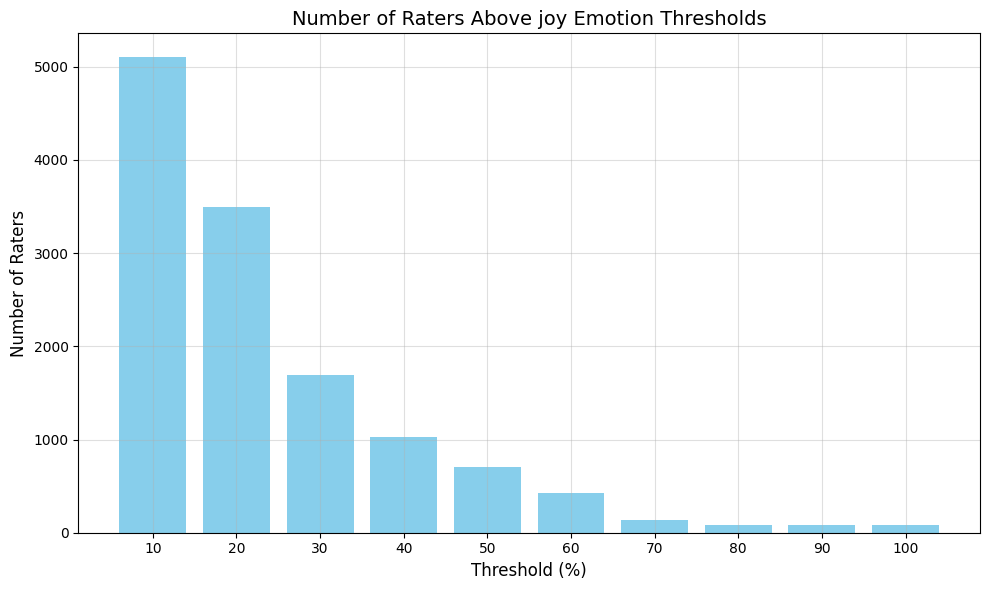

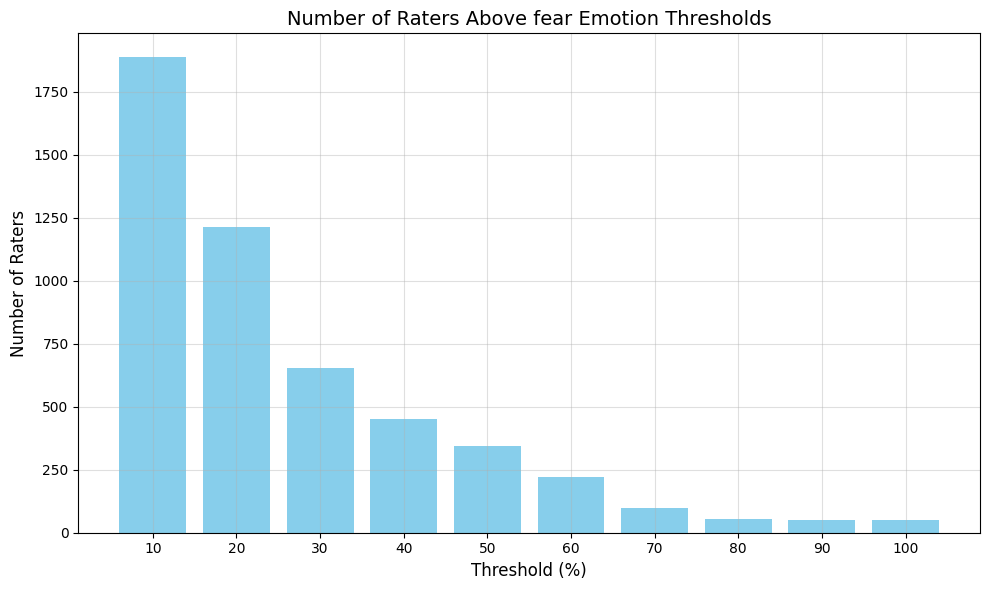

Emotion Threshold Matrix:
        10    20    30    40   50   60   70   80   90   100
anger  4979  3455  1823  1184  883  556  180  116  108  108
joy    5102  3499  1694  1023  701  421  138   85   79   79
fear   1888  1212   653   453  345  221  100   54   52   52


In [ ]:
import matplotlib.pyplot as plt

# Function to update a bar graph for the number of raters above emotion thresholds, for each emotion in separate graphs
def plot_emotions_by_thresholds(user_emotions, thresholds=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100], emotions=None):
    if emotions is None:
        emotions = user_emotions.columns  # Use all emotions if no specific emotions are provided

    emotion_threshold_data = []

    for emotion in emotions:
        emotion_counts = []

        for threshold in thresholds:
            result = count_raters_above_emotion_threshold(emotion=emotion, percent=threshold)
            emotion_counts.append(result['count'])

        emotion_threshold_data.append(emotion_counts)

        # Creating bar graph for each emotion
        fig, ax = plt.subplots(figsize=(10, 6))

        ax.bar(thresholds, emotion_counts, width=8, color='skyblue')
        ax.set_title(f"Number of Raters Above {emotion} Emotion Thresholds", fontsize=14)
        ax.set_xlabel("Threshold (%)", fontsize=12)
        ax.set_ylabel("Number of Raters", fontsize=12)
        ax.set_xticks(thresholds)
        ax.set_xticklabels(thresholds)
        ax.grid(True, alpha=0.4)
        plt.tight_layout()
        plt.show()

    emotion_threshold_matrix = pd.DataFrame(emotion_threshold_data, columns=thresholds, index=emotions)

    return emotion_threshold_matrix

# Example usage:
emotions_to_analyze = ['anger', 'joy', 'fear']  # Example, you can specify emotions here
emotion_threshold_matrix = plot_emotions_by_thresholds(user_emotions, emotions=emotions_to_analyze)

print("Emotion Threshold Matrix:")
print(emotion_threshold_matrix)



In [ ]:
def get_responses_by_user(combined_df, selected_user):
    responded_to_user = combined_df[combined_df['author'] == selected_user]
    return responded_to_user

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
3747,*Hey just noticed..* it's your **2nd Cakeday**...,eez8dxh,CakeDay--Bot,loveafterlockup,t3_ajvfmi,t1_eez3w06,2019-01-26 01:16:59,20,False,0,...,0,0,0,0,0,0,0,0,0,1
5616,*Hey just noticed..* it's your **2nd Cakeday**...,ef6dqtg,CakeDay--Bot,sadcringe,t3_akh7do,t1_ef5akx4,2019-01-28 15:01:26,24,False,0,...,0,0,0,0,0,0,0,0,0,1
7717,*Hey just noticed..* it's your **2nd Cakeday**...,ef6dqtg,CakeDay--Bot,sadcringe,t3_akh7do,t1_ef5akx4,2019-01-28 15:01:26,5,False,0,...,0,0,0,0,0,0,0,0,0,0
12073,*Hey just noticed..* it's your **5th Cakeday**...,ef4ypl3,CakeDay--Bot,DevilMayCry,t3_akd36x,t1_ef4ha42,2019-01-28 01:00:18,56,False,0,...,0,0,0,0,0,0,0,0,0,0
15678,*Hey just noticed..* it's your **4th Cakeday**...,ees7l5w,CakeDay--Bot,rpghorrorstories,t3_aitycw,t1_ees7ht7,2019-01-23 18:28:55,21,False,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202915,*Hey just noticed..* it's your **1st Cakeday**...,eew3zxy,CakeDay--Bot,forhonor,t3_ajfz47,t1_eevotvn,2019-01-25 01:30:29,4,False,0,...,0,0,0,0,0,0,0,0,0,0
203231,*Hey just noticed..* it's your **7th Cakeday**...,eezfh6m,CakeDay--Bot,justneckbeardthings,t3_ajiw2z,t1_eewu8ju,2019-01-26 02:51:01,67,False,0,...,0,0,0,0,0,0,0,0,0,0
206254,*Hey just noticed..* it's your **1st Cakeday**...,efgm2no,CakeDay--Bot,seduction,t3_aliakl,t1_efe8n39,2019-01-31 18:36:29,34,False,0,...,1,0,0,0,0,0,0,0,0,0
207977,*Hey just noticed..* it's your **4th Cakeday**...,ees7l5w,CakeDay--Bot,rpghorrorstories,t3_aitycw,t1_ees7ht7,2019-01-23 18:28:55,55,False,0,...,1,0,0,0,0,0,0,0,0,0


The function count_reactions_and_responses performs the following actions:

1. Filters posts by the selected user: It finds all the posts made by the selected user.
2. Filters responses received: It searches for all the comments made in response to the selected user's posts.
3. Collects names of users who commented: It creates a list of all users who commented on the selected user's posts.
4. Collects emotions in the responses: It scans the emotions for each comment made on the selected user's posts and stores only those emotions with a value of 1.
5. Collects emotions on posts the user responded to: It stores the emotions of the posts that the selected user commented on and includes only the emotions with a value of 1.
The function returns the following information:
 * The number of posts written by the selected user.
 * The number of comments received on the selected user's posts.
 * A list of users who commented on the selected user's posts.
 * A list of comments with the relevant emotions (only those with a value of 1).
 *A list of posts that the user responded to, with the emotions found in those posts.

In [ ]:
def count_reactions_and_responses(combined_df, selected_user, emotion_columns=emotion_columns):
    # Filter for posts made by the selected user
    responded_to_user = combined_df[combined_df['author'] == selected_user]
    num_responses = responded_to_user.shape[0]  # Number of posts by the selected user

    # Filter for comments made by others in response to the selected user
    user_responses = combined_df[combined_df['parent_id'].isin(responded_to_user['link_id'])]
    num_reactions = user_responses.shape[0]  # Number of comments received by the selected user

    # Extracting the authors of the responses (those who commented on the selected user)
    responding_authors = user_responses['author'].unique().tolist()

    # Extracting the posts that the selected user has commented on, ensuring no duplicates
    commented_posts = combined_df[combined_df['parent_id'].isin(user_responses['link_id'])].drop_duplicates(subset='link_id')
    commented_posts_data = []
    for _, row in commented_posts.iterrows():
        emotions = row[emotion_columns].to_dict()  # Get emotions for each commented post

        # Filter emotions with value 1
        emotions_with_1 = {emotion: value for emotion, value in emotions.items() if value == 1}

        # Store only emotions with value 1 for the commented post
        commented_data = {
            'commented_post_id': row['link_id'],
            'commenter': row['author'],
            'emotions': emotions_with_1  # Store emotions with value 1
        }
        commented_posts_data.append(commented_data)

    # Adding emotions for each response to the selected user
    responses_with_emotions = []
    for _, row in user_responses.iterrows():
        emotions = row[emotion_columns].to_dict()  # Get emotions for each response

        # Filter emotions with value 1
        emotions_with_1 = {emotion: value for emotion, value in emotions.items() if value == 1}

        # Store only emotions with value 1 for the response
        response_data = {
            'response_id': row['link_id'],
            'responder': row['author'],
            'emotions': emotions_with_1  # Store emotions with value 1
        }
        responses_with_emotions.append(response_data)

    return {
        'user': selected_user,
        'num_responses': num_responses,
        'num_reactions': num_reactions,
        'responding_authors': responding_authors,
        'responses_with_emotions': responses_with_emotions,
        'commented_posts_data': commented_posts_data  # List of posts the selected user commented on
    }



selected_user = 'CakeDay--Bot'
result = count_reactions_and_responses(combined_df, selected_user)
result

{'user': 'CakeDay--Bot',
 'num_responses': 96,
 'num_reactions': 58,
 'responding_authors': ['LeviPerson',
  'yosoyellogan',
  'ChuckGotWood',
  'emptyrevolution',
  'yosoyjackiejorpjomp',
  'YaBoiWilson',
  'beatslvt4420',
  'zandelion87',
  'Ths-1',
  'cangster360',
  '3ricss0n',
  'bcr76',
  'AgrenHirogaard',
  'WildCard0102',
  'Mehseenbetter',
  'tuckermans'],
 'responses_with_emotions': [{'response_id': 't3_aitycw',
   'responder': 'LeviPerson',
   'emotions': {'disgust': 1}},
  {'response_id': 't3_ai6lwv',
   'responder': 'yosoyellogan',
   'emotions': {'love': 1}},
  {'response_id': 't3_ai6lwv',
   'responder': 'ChuckGotWood',
   'emotions': {'embarrassment': 1}},
  {'response_id': 't3_ai6lwv',
   'responder': 'emptyrevolution',
   'emotions': {'disgust': 1}},
  {'response_id': 't3_akh7do',
   'responder': 'yosoyjackiejorpjomp',
   'emotions': {'anger': 1}},
  {'response_id': 't3_ai6lwv',
   'responder': 'YaBoiWilson',
   'emotions': {'neutral': 1}},
  {'response_id': 't3_ai6lw